In [1]:
%matplotlib inline

In [53]:
from Bio import SeqIO
from matplotlib import pyplot as plt
import numpy as np

In [70]:
genome = list(SeqIO.parse('../Data/examples_for_testing/ecoli_PRODIGAL.gbk', "genbank"))
assert len(genome)== 1
genome = genome [0]

AssertionError: 

In [14]:
print(genome)

ID: NC_000913.3
Name: NC_000913
Description: Escherichia coli str. K-12 substr. MG1655, complete genome
Database cross-references: BioProject:PRJNA57779, BioSample:SAMN02604091, Assembly:GCF_000005845.2
Number of features: 9900
/molecule_type=DNA
/topology=circular
/data_file_division=CON
/date=11-OCT-2018
/accessions=['NC_000913']
/sequence_version=3
/keywords=['RefSeq']
/source=Escherichia coli str. K-12 substr. MG1655
/organism=Escherichia coli str. K-12 substr. MG1655
/taxonomy=['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Enterobacterales', 'Enterobacteriaceae', 'Escherichia']
/references=[Reference(title='Escherichia coli K-12: a cooperatively developed annotation snapshot--2005', ...), Reference(title='Highly accurate genome sequences of Escherichia coli K-12 strains MG1655 and W3110', ...), Reference(title='The complete genome sequence of Escherichia coli K-12', ...), Reference(title='Workshop on Annotation of Escherichia coli K-12', ...), Reference(title='ASAP: Escher

In [15]:
example_feature = genome.features[2]

In [16]:
print(example_feature)

type: CDS
location: [189:255](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['UniProtKB/Swiss-Prot:P0AD86', 'ASAP:ABE-0000006', 'ECOCYC:EG11277', 'EcoGene:EG11277', 'GeneID:944742']
    Key: gene, Value: ['thrL']
    Key: gene_synonym, Value: ['ECK0001']
    Key: locus_tag, Value: ['b0001']
    Key: product, Value: ['thr operon leader peptide']
    Key: protein_id, Value: ['NP_414542.1']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MKRISTTITTTITITTGNGAG']



In [26]:
# example_feature.qualifiers["translation"]
# assert len(example_feature.qualifiers["translation"]) == 1
# len(example_feature.qualifiers["translation"][0])

# example_feature.location.end - example_feature.location.start
example_feature.extract(genome.seq)
# len(example_feature.extract(genome.seq))

Seq('ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAAC...TGA', IUPACAmbiguousDNA())

In [31]:
#genome.seq[189:255]#.reverse_complement()

Seq('ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAAC...TGA', IUPACAmbiguousDNA())

In [68]:
cds_length = []
for feature in genome.features:
    if feature.type == "CDS":
        tmp_len = feature.location.end - feature.location.start
        try:
            assert tmp_len % 3 == 0
            cds_length.append(tmp_len)
        except AssertionError:
            print('Error on this gene:', feature.qualifiers['gene'])
#         print(tmp_len)
#         assert tmp_len % 3 == 0
#         cds_length.append(tmp_len)

Error on this gene: ['crl']
Error on this gene: ['insN']
Error on this gene: ['afuB']
Error on this gene: ['yaiX']
Error on this gene: ['yaiT']
Error on this gene: ['dnaX']
Error on this gene: ['copA']
Error on this gene: ['ybbD']
Error on this gene: ['renD']
Error on this gene: ['nmpC']
Error on this gene: ['ybcY']
Error on this gene: ['ybeM']
Error on this gene: ['efeU']
Error on this gene: ['ycgH']
Error on this gene: ['ycgI']
Error on this gene: ['gapC']
Error on this gene: ['yncI']
Error on this gene: ['yneL']
Error on this gene: ['yneO']
Error on this gene: ['arpB']
Error on this gene: ['yedN']
Error on this gene: ['yedS']
Error on this gene: ['yoeA']
Error on this gene: ['wbbL']
Error on this gene: ['gatR']
Error on this gene: ['gatC']
Error on this gene: ['mdtQ']
Error on this gene: ['yejO']
Error on this gene: ['yfjV']
Error on this gene: ['ypjI']
Error on this gene: ['ygaY']
Error on this gene: ['ygeF']
Error on this gene: ['pbl']
Error on this gene: ['ygeN']
Error on this ge

In [69]:
len(cds_length)

4310

In [60]:
1178%3

2

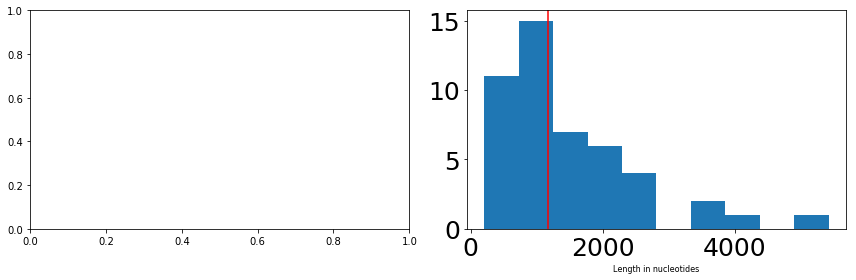

In [64]:
fig, ax_arr = plt.subplots(ncols=2, figsize=(12, 4))
ax_arr[1].hist(cds_length)
ax_arr[1].set_xlabel('Length in nucleotides', fontsize = 8)
ax_arr[1].tick_params(labelsize=25)
ax_arr[1].axvline(np.median(cds_length), c='r')
plt.tight_layout()

In [65]:
len(cds_length)

47

# Find how many of each different start codon are used in the E coli genome

# Find how many of each different start codon are used in the E coli genome

# Extract all the upstream regions (-10 to 0)